In [41]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from tensorflow.keras.losses import categorical_crossentropy,binary_crossentropy

from sklearn import metrics
from tensorflow.keras.utils import to_categorical

In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

In [45]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [46]:
# trainY = to_categorical(trainY, 10)
# testY = to_categorical(testY, 10)

# train_labels = to_categorical(train_labels, 10)
# test_labels = to_categorical(test_labels, 10)

In [47]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
filepath = 'eachModel1/CheckPoint-{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1,
    save_best_only=False,save_weights_only=False, mode='auto', save_freq='epoch')

In [52]:
history = model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10,callbacks=[checkpoint])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.4846 - accuracy: 0.8277
Epoch 1: saving model to eachModel1\CheckPoint-01.hdf5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4844 - accuracy: 0.8278 - val_loss: 0.4195 - val_accuracy: 0.8489
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.3641 - accuracy: 0.8675
Epoch 2: saving model to eachModel1\CheckPoint-02.hdf5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3639 - accuracy: 0.8676 - val_loss: 0.4025 - val_accuracy: 0.8538
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3280 - accuracy: 0.8796
Epoch 3: saving model to eachModel1\CheckPoint-03.hdf5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3283 - accuracy: 0.8795 - val_loss: 0.3569 - val_accuracy: 0.8665
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3026 - accuracy: 0.8866
Epoch 4: saving model to eachModel1\Check

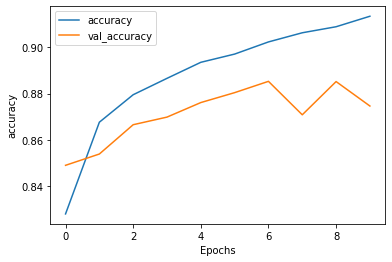

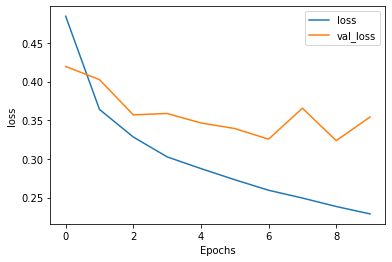

In [53]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

FARKLI BAŞLANGIÇ NOKTALARI İÇİN PCA ÇİZİMİ

In [54]:
allPointWeightX1 = []
allPointWeightY1 = []

In [55]:
for j in range(5):
    for i in range(10):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:5]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightX1.append(np.array(myModelweight[0:5]))
    
    for i in range(10):
        if i>=9:
            myModel = load_model('eachModel{}/CheckPoint-{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[5]))
        else:
            myModel = load_model('eachModel{}/CheckPoint-0{}.hdf5'.format(j+1,i+1))
            myModelweight = myModel.get_weights()
            allPointWeightY1.append(np.array(myModelweight[5]))

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2549362355.py:10: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2549362355.py:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [56]:
allPointWeightX1 = np.array(allPointWeightX1)
allPointWeightY1 = np.array(allPointWeightY1)

In [57]:
for i in range(50):
    allPointWeightX1[i][0] = allPointWeightX1[i][0].flatten()
    allPointWeightX1[i][1] = allPointWeightX1[i][1].flatten()
    allPointWeightX1[i][2] = allPointWeightX1[i][2].flatten()
    allPointWeightX1[i][3] = allPointWeightX1[i][3].flatten()
    allPointWeightX1[i][4] = allPointWeightX1[i][4].flatten()

In [58]:
Xlist= []
for i in range(50):
    Xlist.append(np.hstack((allPointWeightX1[i][0],allPointWeightX1[i][1],allPointWeightX1[i][2],allPointWeightX1[i][3],allPointWeightX1[i][4])))

In [59]:
Xlist = np.array(Xlist)

In [60]:
df = px.data.iris()
X = Xlist

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [61]:
X = Xlist

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

MODEL GRADİENT HESABI İLE OPTİMUM YOLUN BULUNMASI

In [62]:
modellerim = []

1. İLE 2. NOKTA ARASINDA

In [63]:
w0 = load_model('eachModel1/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel2/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari12 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            y_tran = to_categorical(y,10)


            # listem2 = []
            # for i in range(60000):
            #     listem2.append(1)
            #     for j in range(9):
            #         listem2.append(0)

            # listem2 = np.array(listem2)
            # listem2 = np.reshape(listem2,(60000,10))
            # listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(y_tran)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i])))
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1])))

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.000001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    if i>0 and i<6:
        modellerim.append(model)
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 1s 4ms/step - loss: 0.3542 - accuracy: 0.8746
Interpolated weights 1:
313/313 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.8107
Interpolated weights 2:
313/313 [==============================] - 1s 4ms/step - loss: 1.1818 - accuracy: 0.5691
Interpolated weights 3:
313/313 [==============================] - 1s 4ms/step - loss: 1.0902 - accuracy: 0.6263
Interpolated weights 4:
313/313 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.8533
Interpolated weights 5:
313/313 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8780
Interpolated weights 6:
313/313 [==============================] - 1s 4ms/step - loss: 1.1818 - accuracy: 0.5691
0.3541560173034668 1.1817656755447388
 31/313 [=>............................] - ETA: 0s - loss: 0.5447 - accuracy: 0.8044

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3590087296.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 1.0902 - accuracy: 0.6263
0.5276841521263123 1.0901920795440674
313/313 [==============================] - 1s 3ms/step - loss: 0.4406 - accuracy: 0.8533
1.1817656755447388 0.4405885636806488
 31/313 [=>............................] - ETA: 0s - loss: 1.1246 - accuracy: 0.6230

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3590087296.py:90: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8780
1.0901920795440674 0.353603720664978
313/313 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8780
0.4405885636806488 0.35360366106033325


C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3590087296.py:96: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3590087296.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3590087296.py:145: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

313/313 [==============================] - 1s 4ms/step - loss: 1.0858 - accuracy: 0.6424
0.3541560173034668 1.085782766342163
313/313 [==============================] - 1s 4ms/step - loss: 1.0173 - accuracy: 0.6843
0.4992663562297821 1.017263650894165
313/313 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.8587
1.085782766342163 0.431148499250412
313/313 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8798
1.017263650894165 0.34887200593948364
313/313 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8780
0.431148499250412 0.35360366106033325
313/313 [==============================] - 1s 4ms/step - loss: 1.0106 - accuracy: 0.6997
0.3541560173034668 1.0105938911437988
313/313 [==============================] - 1s 4ms/step - loss: 0.9588 - accuracy: 0.7292
0.483173668384552 0.958753228187561
313/313 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.8628
1.0105938911437988 0.4258725

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


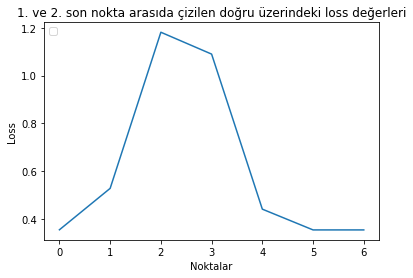

In [64]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('1. ve 2. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


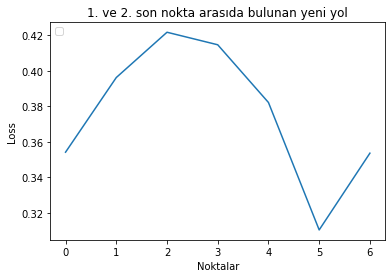

In [65]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('1. ve 2. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [66]:
ilknoktalar12 = ilkdogrunoktalari12.copy()

for i in range(7):
    ilknoktalar12[i][0] = ilknoktalar12[i][0].flatten()
    ilknoktalar12[i][1] = ilknoktalar12[i][1].flatten()
    ilknoktalar12[i][2] = ilknoktalar12[i][2].flatten()
    ilknoktalar12[i][3] = ilknoktalar12[i][3].flatten()
    ilknoktalar12[i][4] = ilknoktalar12[i][4].flatten()

Xaralist12= []
for i in range(7):
    Xaralist12.append(np.hstack((ilknoktalar12[i][0],ilknoktalar12[i][1],ilknoktalar12[i][2],ilknoktalar12[i][3],ilknoktalar12[i][4])))



sonnoktalar12 = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar12[i][0] = sonnoktalar12[i][0].flatten()
    sonnoktalar12[i][1] = sonnoktalar12[i][1].flatten()
    sonnoktalar12[i][2] = sonnoktalar12[i][2].flatten()
    sonnoktalar12[i][3] = sonnoktalar12[i][3].flatten()
    sonnoktalar12[i][4] = sonnoktalar12[i][4].flatten()

Xsonaralist12= []
for i in range(7):
    Xsonaralist12.append(np.hstack((sonnoktalar12[i][0],sonnoktalar12[i][1],sonnoktalar12[i][2],sonnoktalar12[i][3],sonnoktalar12[i][4])))




Xaralist12 = np.array(Xaralist12)
Xsonaralist12 = np.array(Xsonaralist12)
alldizi = np.vstack((Xlist,Xaralist12,Xsonaralist12))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [67]:
alldizi = np.vstack((Xlist,Xaralist12,Xsonaralist12))

X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

2. İLE 3. NOKTA ARASINDA

In [68]:
w0 = load_model('eachModel2/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel3/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari23 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            y_tran = to_categorical(y,10)


            # listem2 = []
            # for i in range(60000):
            #     listem2.append(1)
            #     for j in range(9):
            #         listem2.append(0)

            # listem2 = np.array(listem2)
            # listem2 = np.reshape(listem2,(60000,10))
            # listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(y_tran)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i])))
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1])))

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.000001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    if i>0 and i<6:
        modellerim.append(model)
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8780
Interpolated weights 1:
313/313 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.8336
Interpolated weights 2:
313/313 [==============================] - 1s 3ms/step - loss: 1.1426 - accuracy: 0.6588
Interpolated weights 3:
313/313 [==============================] - 1s 3ms/step - loss: 1.2049 - accuracy: 0.5960
Interpolated weights 4:
313/313 [==============================] - 1s 3ms/step - loss: 0.4682 - accuracy: 0.8492
Interpolated weights 5:
313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8855
Interpolated weights 6:
313/313 [==============================] - 1s 3ms/step - loss: 1.1426 - accuracy: 0.6588
0.35360366106033325 1.142633318901062
 13/313 [>.............................] - ETA: 1s - loss: 0.4859 - accuracy: 0.8413 

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2785982114.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 3ms/step - loss: 1.2049 - accuracy: 0.5960
0.4953024983406067 1.2049002647399902
313/313 [==============================] - 1s 3ms/step - loss: 0.4682 - accuracy: 0.8492
1.142633318901062 0.468244731426239
 32/313 [==>...........................] - ETA: 0s - loss: 1.2024 - accuracy: 0.5869

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2785982114.py:90: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8855
1.2049002647399902 0.32794633507728577
313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8855
0.468244731426239 0.32794642448425293


C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2785982114.py:96: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2785982114.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\2785982114.py:145: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

313/313 [==============================] - 1s 3ms/step - loss: 1.0752 - accuracy: 0.6866
0.35360366106033325 1.075210690498352
313/313 [==============================] - 1s 3ms/step - loss: 1.1005 - accuracy: 0.6659
0.4908144176006317 1.1004542112350464
313/313 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.8544
1.075210690498352 0.4613015055656433
313/313 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8860
1.1004542112350464 0.3263387680053711
313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8855
0.4613015055656433 0.32794642448425293
313/313 [==============================] - 1s 3ms/step - loss: 1.0227 - accuracy: 0.7070
0.35360366106033325 1.0227069854736328
313/313 [==============================] - 1s 3ms/step - loss: 1.0325 - accuracy: 0.7016
0.48827192187309265 1.0325453281402588
313/313 [==============================] - 1s 3ms/step - loss: 0.4571 - accuracy: 0.8579
1.0227069854736328 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


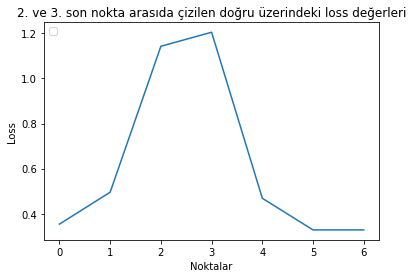

In [69]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('2. ve 3. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


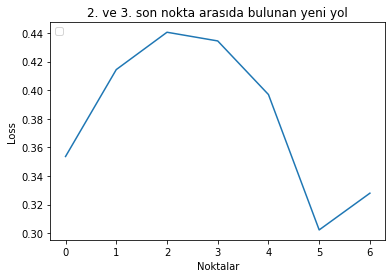

In [70]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('2. ve 3. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [71]:
ilknoktalar23 = ilkdogrunoktalari23.copy()

for i in range(7):
    ilknoktalar23[i][0] = ilknoktalar23[i][0].flatten()
    ilknoktalar23[i][1] = ilknoktalar23[i][1].flatten()
    ilknoktalar23[i][2] = ilknoktalar23[i][2].flatten()
    ilknoktalar23[i][3] = ilknoktalar23[i][3].flatten()
    ilknoktalar23[i][4] = ilknoktalar23[i][4].flatten()

Xaralist23= []
for i in range(7):
    Xaralist23.append(np.hstack((ilknoktalar23[i][0],ilknoktalar23[i][1],ilknoktalar23[i][2],ilknoktalar23[i][3],ilknoktalar23[i][4])))



sonnoktalar23 = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar23[i][0] = sonnoktalar23[i][0].flatten()
    sonnoktalar23[i][1] = sonnoktalar23[i][1].flatten()
    sonnoktalar23[i][2] = sonnoktalar23[i][2].flatten()
    sonnoktalar23[i][3] = sonnoktalar23[i][3].flatten()
    sonnoktalar23[i][4] = sonnoktalar23[i][4].flatten()

Xsonaralist23= []
for i in range(7):
    Xsonaralist23.append(np.hstack((sonnoktalar23[i][0],sonnoktalar23[i][1],sonnoktalar23[i][2],sonnoktalar23[i][3],sonnoktalar23[i][4])))




Xaralist23 = np.array(Xaralist23)
Xsonaralist23 = np.array(Xsonaralist23)
alldizi = np.vstack((Xlist,Xaralist23,Xsonaralist23))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [72]:
alldizi = np.vstack((Xlist,Xaralist23,Xsonaralist23))

X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

3. İLE 4. NOKTA ARASINDA

In [73]:
w0 = load_model('eachModel3/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel4/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari34 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            y_tran = to_categorical(y,10)


            # listem2 = []
            # for i in range(60000):
            #     listem2.append(1)
            #     for j in range(9):
            #         listem2.append(0)

            # listem2 = np.array(listem2)
            # listem2 = np.reshape(listem2,(60000,10))
            # listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(y_tran)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i])))
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1])))

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.000001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    if i>0 and i<6:
        modellerim.append(model)
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 2s 5ms/step - loss: 0.3279 - accuracy: 0.8855
Interpolated weights 1:
313/313 [==============================] - 1s 5ms/step - loss: 0.4750 - accuracy: 0.8472
Interpolated weights 2:
313/313 [==============================] - 2s 5ms/step - loss: 1.1168 - accuracy: 0.6298
Interpolated weights 3:
313/313 [==============================] - 2s 5ms/step - loss: 1.1888 - accuracy: 0.5706
Interpolated weights 4:
313/313 [==============================] - 2s 5ms/step - loss: 0.4670 - accuracy: 0.8417
Interpolated weights 5:
313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8833
Interpolated weights 6:
313/313 [==============================] - 1s 4ms/step - loss: 1.1168 - accuracy: 0.6298
0.32794642448425293 1.1168464422225952
 15/313 [>.............................] - ETA: 1s - loss: 0.4944 - accuracy: 0.8396 

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3561408934.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 1.1888 - accuracy: 0.5706
0.4750406742095947 1.1888235807418823
313/313 [==============================] - 1s 4ms/step - loss: 0.4670 - accuracy: 0.8417
1.1168464422225952 0.46704745292663574
 14/313 [>.............................] - ETA: 1s - loss: 1.1674 - accuracy: 0.5982 

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3561408934.py:90: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8833
1.1888235807418823 0.3488624393939972
313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8833
0.46704745292663574 0.3488624393939972


C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3561408934.py:96: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3561408934.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\3561408934.py:145: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

313/313 [==============================] - 1s 4ms/step - loss: 1.0016 - accuracy: 0.7220
0.32794642448425293 1.001638650894165
313/313 [==============================] - 1s 4ms/step - loss: 1.0940 - accuracy: 0.6435
0.469402939081192 1.0940101146697998
313/313 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.8499
1.001638650894165 0.4586166441440582
313/313 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.8846
1.0940101146697998 0.34374380111694336
313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8833
0.4586166441440582 0.3488624393939972
313/313 [==============================] - 2s 5ms/step - loss: 0.9381 - accuracy: 0.7536
0.32794642448425293 0.9381420016288757
313/313 [==============================] - 1s 4ms/step - loss: 1.0230 - accuracy: 0.6891
0.4655146598815918 1.0229699611663818
313/313 [==============================] - 1s 4ms/step - loss: 0.4534 - accuracy: 0.8542
0.9381420016288757 0.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


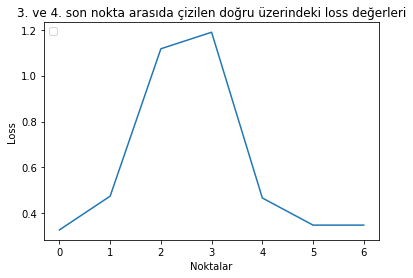

In [74]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('3. ve 4. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


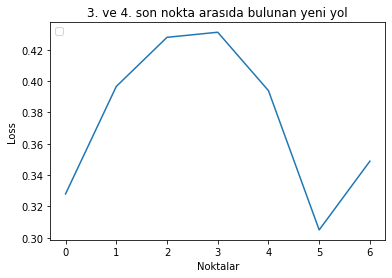

In [75]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('3. ve 4. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [76]:
ilknoktalar34 = ilkdogrunoktalari34.copy()

for i in range(7):
    ilknoktalar34[i][0] = ilknoktalar34[i][0].flatten()
    ilknoktalar34[i][1] = ilknoktalar34[i][1].flatten()
    ilknoktalar34[i][2] = ilknoktalar34[i][2].flatten()
    ilknoktalar34[i][3] = ilknoktalar34[i][3].flatten()
    ilknoktalar34[i][4] = ilknoktalar34[i][4].flatten()

Xaralist34= []
for i in range(7):
    Xaralist34.append(np.hstack((ilknoktalar34[i][0],ilknoktalar34[i][1],ilknoktalar34[i][2],ilknoktalar34[i][3],ilknoktalar34[i][4])))



sonnoktalar34 = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar34[i][0] = sonnoktalar34[i][0].flatten()
    sonnoktalar34[i][1] = sonnoktalar34[i][1].flatten()
    sonnoktalar34[i][2] = sonnoktalar34[i][2].flatten()
    sonnoktalar34[i][3] = sonnoktalar34[i][3].flatten()
    sonnoktalar34[i][4] = sonnoktalar34[i][4].flatten()

Xsonaralist34= []
for i in range(7):
    Xsonaralist34.append(np.hstack((sonnoktalar34[i][0],sonnoktalar34[i][1],sonnoktalar34[i][2],sonnoktalar34[i][3],sonnoktalar34[i][4])))




Xaralist34 = np.array(Xaralist34)
Xsonaralist34 = np.array(Xsonaralist34)
alldizi = np.vstack((Xlist,Xaralist34,Xsonaralist34))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [77]:
alldizi = np.vstack((Xlist,Xaralist34,Xsonaralist34))

X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

4. İLE 5. NOKTA ARASINDA

In [78]:
w0 = load_model('eachModel4/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel5/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari45 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            y_tran = to_categorical(y,10)


            # listem2 = []
            # for i in range(60000):
            #     listem2.append(1)
            #     for j in range(9):
            #         listem2.append(0)

            # listem2 = np.array(listem2)
            # listem2 = np.reshape(listem2,(60000,10))
            # listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(y_tran)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i])))
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1])))

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.000001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    if i>0 and i<6:
        modellerim.append(model)
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 2s 5ms/step - loss: 0.3489 - accuracy: 0.8833
Interpolated weights 1:
313/313 [==============================] - 2s 5ms/step - loss: 0.4481 - accuracy: 0.8637
Interpolated weights 2:
313/313 [==============================] - 1s 5ms/step - loss: 1.1073 - accuracy: 0.6842
Interpolated weights 3:
313/313 [==============================] - 1s 4ms/step - loss: 1.0744 - accuracy: 0.7073
Interpolated weights 4:
313/313 [==============================] - 1s 4ms/step - loss: 0.4428 - accuracy: 0.8582
Interpolated weights 5:
313/313 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8867
Interpolated weights 6:
313/313 [==============================] - 1s 4ms/step - loss: 1.1073 - accuracy: 0.6842
0.3488624393939972 1.1072795391082764
 14/313 [>.............................] - ETA: 1s - loss: 0.4582 - accuracy: 0.8638 

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\1697062307.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 1.0744 - accuracy: 0.7073
0.448138028383255 1.0743638277053833
313/313 [==============================] - 1s 4ms/step - loss: 0.4428 - accuracy: 0.8582
1.1072795391082764 0.44284671545028687
 26/313 [=>............................] - ETA: 1s - loss: 1.0769 - accuracy: 0.7103

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\1697062307.py:90: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8867
1.0743638277053833 0.3324909806251526
313/313 [==============================] - 2s 5ms/step - loss: 0.3325 - accuracy: 0.8867
0.44284671545028687 0.3324909508228302


C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\1697062307.py:96: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\1697062307.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\1697062307.py:145: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

313/313 [==============================] - 1s 4ms/step - loss: 1.0497 - accuracy: 0.7162
0.3488624393939972 1.0497229099273682
313/313 [==============================] - 2s 5ms/step - loss: 1.0256 - accuracy: 0.7287
0.4480259418487549 1.025586724281311
313/313 [==============================] - 1s 4ms/step - loss: 0.4385 - accuracy: 0.8621
1.0497229099273682 0.4385279715061188
313/313 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8886
1.025586724281311 0.3298020660877228
313/313 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8867
0.4385279715061188 0.3324909508228302
313/313 [==============================] - 1s 5ms/step - loss: 1.0015 - accuracy: 0.7357
0.3488624393939972 1.001466155052185
313/313 [==============================] - 1s 4ms/step - loss: 0.9851 - accuracy: 0.7417
0.4483937621116638 0.9850552678108215
313/313 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8632
1.001466155052185 0.43660

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


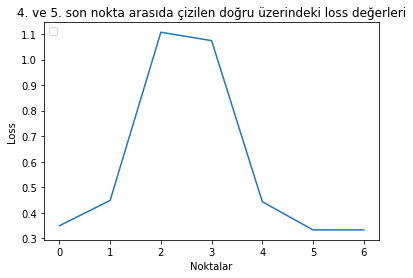

In [79]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('4. ve 5. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


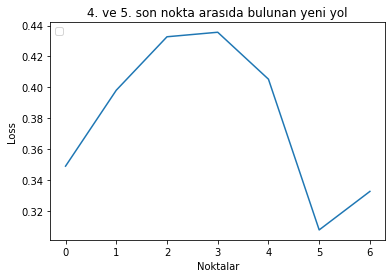

In [80]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('4. ve 5. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Noktalar')
plt.legend(loc="upper left")
plt.show()

In [81]:
ilknoktalar45 = ilkdogrunoktalari45.copy()

for i in range(7):
    ilknoktalar45[i][0] = ilknoktalar45[i][0].flatten()
    ilknoktalar45[i][1] = ilknoktalar45[i][1].flatten()
    ilknoktalar45[i][2] = ilknoktalar45[i][2].flatten()
    ilknoktalar45[i][3] = ilknoktalar45[i][3].flatten()
    ilknoktalar45[i][4] = ilknoktalar45[i][4].flatten()

Xaralist45= []
for i in range(7):
    Xaralist45.append(np.hstack((ilknoktalar45[i][0],ilknoktalar45[i][1],ilknoktalar45[i][2],ilknoktalar45[i][3],ilknoktalar45[i][4])))



sonnoktalar45 = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar45[i][0] = sonnoktalar45[i][0].flatten()
    sonnoktalar45[i][1] = sonnoktalar45[i][1].flatten()
    sonnoktalar45[i][2] = sonnoktalar45[i][2].flatten()
    sonnoktalar45[i][3] = sonnoktalar45[i][3].flatten()
    sonnoktalar45[i][4] = sonnoktalar45[i][4].flatten()

Xsonaralist45= []
for i in range(7):
    Xsonaralist45.append(np.hstack((sonnoktalar45[i][0],sonnoktalar45[i][1],sonnoktalar45[i][2],sonnoktalar45[i][3],sonnoktalar45[i][4])))




Xaralist45 = np.array(Xaralist45)
Xsonaralist45 = np.array(Xsonaralist45)
alldizi = np.vstack((Xlist,Xaralist45,Xsonaralist45))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [82]:
alldizi = np.vstack((Xlist,Xaralist45,Xsonaralist45))

X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

5. İLE 1. NOKTA ARASINDA

In [83]:
w0 = load_model('eachModel5/CheckPoint-10.hdf5')
firstWeight = w0.get_weights()
# w0.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

wT = load_model('eachModel1/CheckPoint-10.hdf5')
lastWeight = wT.get_weights()
# wT.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=2)

tümNoktalarim = []
for i in range(6):
    tümNoktalarim.append([before + (after - before) * i / 5 for before, after in zip(firstWeight, lastWeight)])
tümNoktalarim.append(lastWeight)

ilkdogrunoktalari51 = tümNoktalarim.copy()

dogruUzerindekiIlkkLoss = []
for i, weights in enumerate(tümNoktalarim):
    model.set_weights(weights)
    print(f'Interpolated weights {i}:')
    loss,accuracy=model.evaluate(test_images, test_labels)
    dogruUzerindekiIlkkLoss.append(loss)

# İterasyon başlangıç
for T in range(100):
    def step(X, y,i):
        # keep track of our gradients
        with tf.GradientTape() as tape:
            # make a prediction using the model and then calculate the
            # loss
            model.set_weights(tümNoktalarim[i])
            pred = model(X)

            y_tran = to_categorical(y,10)


            # listem2 = []
            # for i in range(60000):
            #     listem2.append(1)
            #     for j in range(9):
            #         listem2.append(0)

            # listem2 = np.array(listem2)
            # listem2 = np.reshape(listem2,(60000,10))
            # listem2 = listem2



            # listem = []
            # for i in range(60000):
            #     for j in range(10):
            #         listem.append(y[i])

            # listem = np.array(listem)
            # listem = listem/9
            # listem = np.reshape(listem,(60000,10))
            # tensor1 = tf.convert_to_tensor(listem)

            # print("y : \n",y.shape)
            # print("pred : \n",pred.shape)
            tensor1 = tf.convert_to_tensor(y_tran)
            # print("tensor1 : \n",tensor1.shape)
            tensor2 = tf.reshape(tensor1,[60000,10])
            # print("tensor2 : \n",tensor2.shape)
            loss = categorical_crossentropy(tensor2, pred)
        # calculate the gradients using our tape and then update the
        # model weights
        grads = tape.gradient(loss, model.trainable_variables)
        return grads


    grads = []
    for i in range(1,6,1):
        grads.append(step(train_images,train_labels,i))


    # Tan değerlerinin hesaplanması
    tanvalue = []
    for i in range(1,6,1):
        model.set_weights(tümNoktalarim[i-1])
        dotResult1 = model.evaluate(test_images, test_labels)[0]

        model.set_weights(tümNoktalarim[i+1])
        dotResult2 = model.evaluate(test_images, test_labels)[0]

        print(dotResult1,dotResult2)

        if (dotResult2 > dotResult1):
            tanvalue.append((np.array(tümNoktalarim[i+1]) - np.array(tümNoktalarim[i])))
        else:
            tanvalue.append((np.array(tümNoktalarim[i]) - np.array(tümNoktalarim[i-1])))

    gradList = []
    for i in range(5):
        first = np.array(grads[i][0])
        grad1 = [first[0:60000,:],np.array(grads[i][1]),np.array(grads[i][2]),np.array(grads[i][3]),np.array(grads[i][4]),np.array(grads[i][5])]
        grad1 = np.array(grad1)
        gradList.append(grad1)

    esasGradList = gradList.copy()
    gradList = np.array(gradList)


    for i in range(5):
        gradList[i][0] = gradList[i][0].flatten()
        gradList[i][1] = gradList[i][1].flatten()
        gradList[i][2] = gradList[i][2].flatten()
        gradList[i][3] = gradList[i][3].flatten()
        gradList[i][4] = gradList[i][4].flatten()
        gradList[i][5] = gradList[i][5].flatten()


    tanlistem = []
    for i in range(5):
        tanget = [tanvalue[i][0],tanvalue[i][1],tanvalue[i][2],tanvalue[i][3],tanvalue[i][4],tanvalue[i][5]]
        tanget = np.array(tanget)
        tanlistem.append(tanget)

    esasTanList = tanlistem.copy()
    tanlistem = np.array(tanlistem)

    for i in range(5):
        tanlistem[i][0] = tanlistem[i][0].flatten()
        tanlistem[i][1] = tanlistem[i][1].flatten()
        tanlistem[i][2] = tanlistem[i][2].flatten()
        tanlistem[i][3] = tanlistem[i][3].flatten()
        tanlistem[i][4] = tanlistem[i][4].flatten()
        tanlistem[i][5] = tanlistem[i][5].flatten()

    dotsonuc = []
    for i in range(5):
        denemesonuc1 = np.dot(tanlistem[i][0],gradList[i][0])
        denemesonuc2 = np.dot(tanlistem[i][1],gradList[i][1])
        denemesonuc3 = np.dot(tanlistem[i][2],gradList[i][2])
        denemesonuc4 = np.dot(tanlistem[i][3],gradList[i][3])
        denemesonuc5 = np.dot(tanlistem[i][4],gradList[i][4])
        denemesonuc6 = np.dot(tanlistem[i][5],gradList[i][5])
        sonuc1 = denemesonuc1+denemesonuc2+denemesonuc3+denemesonuc4+denemesonuc5+denemesonuc6
        dotsonuc.append(sonuc1)

    learningrate = 0.000001
    güncelNoktlar = []
    for i in range(5):
        rightresult = dotsonuc[i]*esasTanList[i]
        ilkdeğer = esasGradList[i]-rightresult
        ilkgünceldeger = tümNoktalarim[i+1] - (learningrate*ilkdeğer)
        güncelNoktlar.append(ilkgünceldeger)

    # Bulunan noktaların güncellenmesi
    for i in range(5):
        tümNoktalarim[i+1] = güncelNoktlar[i]


dogruUzerindekiSonkLoss = []
for i in range(0,7,1):
    model.set_weights(tümNoktalarim[i])
    if i>0 and i<6:
        modellerim.append(model)
    dogruResult = model.evaluate(test_images, test_labels)[0]
    dogruUzerindekiSonkLoss.append(dogruResult)

Interpolated weights 0:
313/313 [==============================] - 2s 6ms/step - loss: 0.3325 - accuracy: 0.8867
Interpolated weights 1:
313/313 [==============================] - 2s 7ms/step - loss: 0.4836 - accuracy: 0.8385
Interpolated weights 2:
313/313 [==============================] - 3s 10ms/step - loss: 1.3129 - accuracy: 0.5382
Interpolated weights 3:
313/313 [==============================] - 3s 8ms/step - loss: 1.2282 - accuracy: 0.5509
Interpolated weights 4:
313/313 [==============================] - 2s 6ms/step - loss: 0.5253 - accuracy: 0.8078
Interpolated weights 5:
313/313 [==============================] - 2s 7ms/step - loss: 0.3542 - accuracy: 0.8746
Interpolated weights 6:
313/313 [==============================] - 3s 9ms/step - loss: 1.3129 - accuracy: 0.5382
0.3324909508228302 1.3128869533538818
 11/313 [>.............................] - ETA: 1s - loss: 0.4986 - accuracy: 0.8352 

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\652919018.py:88: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 2s 5ms/step - loss: 1.2282 - accuracy: 0.5509
0.48361802101135254 1.2281696796417236
313/313 [==============================] - 3s 10ms/step - loss: 0.5253 - accuracy: 0.8078
1.3128869533538818 0.5253379344940186
  1/313 [..............................] - ETA: 23s - loss: 1.3315 - accuracy: 0.5625

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\652919018.py:90: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



313/313 [==============================] - 2s 6ms/step - loss: 0.3542 - accuracy: 0.8746
1.2281696796417236 0.3541560173034668
313/313 [==============================] - 3s 10ms/step - loss: 0.3542 - accuracy: 0.8746
0.5253379344940186 0.3541560173034668


C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\652919018.py:96: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\652919018.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

C:\Users\enes_\AppData\Local\Temp\ipykernel_23740\652919018.py:145: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

313/313 [==============================] - 3s 10ms/step - loss: 1.2260 - accuracy: 0.5895
0.3324909508228302 1.2259712219238281
313/313 [==============================] - 2s 6ms/step - loss: 1.1628 - accuracy: 0.6075
0.47561338543891907 1.1627658605575562
313/313 [==============================] - 2s 8ms/step - loss: 0.4991 - accuracy: 0.8287
1.2259712219238281 0.4990997910499573
313/313 [==============================] - 2s 7ms/step - loss: 0.3360 - accuracy: 0.8824
1.1627658605575562 0.33599191904067993
313/313 [==============================] - 3s 11ms/step - loss: 0.3542 - accuracy: 0.8746
0.4990997910499573 0.3541560173034668
313/313 [==============================] - 2s 5ms/step - loss: 1.1553 - accuracy: 0.6397
0.3324909508228302 1.1552860736846924
313/313 [==============================] - 3s 8ms/step - loss: 1.1056 - accuracy: 0.6512
0.47139662504196167 1.105575442314148
313/313 [==============================] - 3s 9ms/step - loss: 0.4861 - accuracy: 0.8443
1.1552860736846924

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


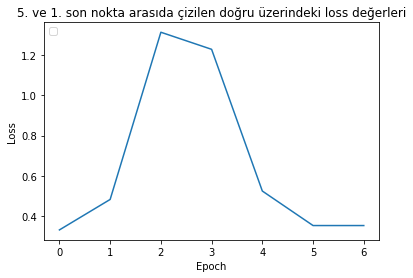

In [84]:
plt.plot(np.arange(0,7),dogruUzerindekiIlkkLoss)
plt.title('5. ve 1. son nokta arasıda çizilen doğru üzerindeki loss değerleri')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


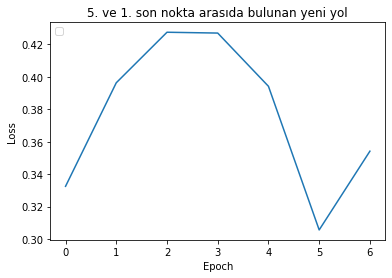

In [85]:
plt.plot(np.arange(0,7),dogruUzerindekiSonkLoss)
plt.title('5. ve 1. son nokta arasıda bulunan yeni yol')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [86]:
ilknoktalar51 = ilkdogrunoktalari51.copy()

for i in range(7):
    ilknoktalar51[i][0] = ilknoktalar51[i][0].flatten()
    ilknoktalar51[i][1] = ilknoktalar51[i][1].flatten()
    ilknoktalar51[i][2] = ilknoktalar51[i][2].flatten()
    ilknoktalar51[i][3] = ilknoktalar51[i][3].flatten()
    ilknoktalar51[i][4] = ilknoktalar51[i][4].flatten()

Xaralist51= []
for i in range(7):
    Xaralist51.append(np.hstack((ilknoktalar51[i][0],ilknoktalar51[i][1],ilknoktalar51[i][2],ilknoktalar51[i][3],ilknoktalar51[i][4])))



sonnoktalar51 = tümNoktalarim.copy()

for i in range(7):
    sonnoktalar51[i][0] = sonnoktalar51[i][0].flatten()
    sonnoktalar51[i][1] = sonnoktalar51[i][1].flatten()
    sonnoktalar51[i][2] = sonnoktalar51[i][2].flatten()
    sonnoktalar51[i][3] = sonnoktalar51[i][3].flatten()
    sonnoktalar51[i][4] = sonnoktalar51[i][4].flatten()

Xsonaralist51= []
for i in range(7):
    Xsonaralist51.append(np.hstack((sonnoktalar51[i][0],sonnoktalar51[i][1],sonnoktalar51[i][2],sonnoktalar51[i][3],sonnoktalar51[i][4])))




Xaralist51 = np.array(Xaralist51)
Xsonaralist51 = np.array(Xsonaralist51)
alldizi = np.vstack((Xlist,Xaralist51,Xsonaralist51))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [87]:
alldizi = np.vstack((Xlist,Xaralist51,Xsonaralist51))

X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

TÜM SON NOKTALARIN BİRLEŞTİRİLMİŞ GÖRÜNTÜSÜ

In [88]:
alldizi = np.vstack((Xlist,Xsonaralist12,Xsonaralist23,Xsonaralist34,Xsonaralist45,Xsonaralist51))

X = alldizi

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [89]:
alldizi = np.vstack((Xlist,Xsonaralist12,Xsonaralist23,Xsonaralist34,Xsonaralist45,Xsonaralist51))


X = alldizi

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

SON NOKTALAR İLE OLUŞTURULAN ENSEMBLE

In [91]:
models = []
for i in range(1,6,1):
    w0 = load_model('eachModel{}/CheckPoint-10.hdf5'.format(i))
    models.append(w0)

preds = [model.predict(test_images) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

ensemble_accuracy = accuracy_score(test_labels, ensemble_prediction)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

313/313 [==============================] - 3s 8ms/step
Accuracy Score for average ensemble =  0.8964


In [92]:
preds = [model.predict(test_images) for model in modellerim]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

ensemble_accuracy = accuracy_score(test_labels, ensemble_prediction)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

313/313 [==============================] - 2s 7ms/step
Accuracy Score for average ensemble =  0.8746
